# UnconBacktest Example: TS Momentum in Cryptocurrencies

We will run a simple "uncon backtest" to test whether 4 of the larger coins (BTC, ETH, ADA, BNB) show time-series momentum. In other words, if they have done well recently, do they tend to continue to do well?

1. Run the first cell to compute returns for these coins since 2016.
2. The signal on each day for each coin will be: sqrt(10)*(avg past 10 day ret - avg past 365 day ret) / (stdev past 365 day ret). You can think of this as the z-score of the past 10 day returns, and it tells us if a coin is doing better than it usually does. Technical note: we multiply by sqrt(10) here because the stdev is calculated on daily data but we want to "z-score" the average 10 day returns.
3. The signal from (2) will have extreme values. Pass them through a tanh function to curtail these. These are your final daily portfolio weights.
4. Compute the returns to the weights from (3). 
5. What is the Sharpe of these strategies? Plot their cumulative returns.
6. How correlated are the timing strategies with the underlying assets?

In [2]:
# compute returns 
import yfinance as yf 
import numpy as np

data = yf.download(['ADA-USD','BNB-USD','BTC-USD','ETH-USD'],'2020-1-1', auto_adjust=False)
ret = data['Adj Close'] / data['Adj Close'].shift() - 1

[*********************100%***********************]  4 of 4 completed


In [3]:
# compute portfolios and strategy returns
port = np.sqrt(10)*(ret.rolling(10,min_periods=1).mean() - ret.rolling(365,min_periods=10).mean()) 
port = port / ret.rolling(365,min_periods=10).std()
port = np.tanh(port)
strat_ret = port.shift()*ret 

<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>

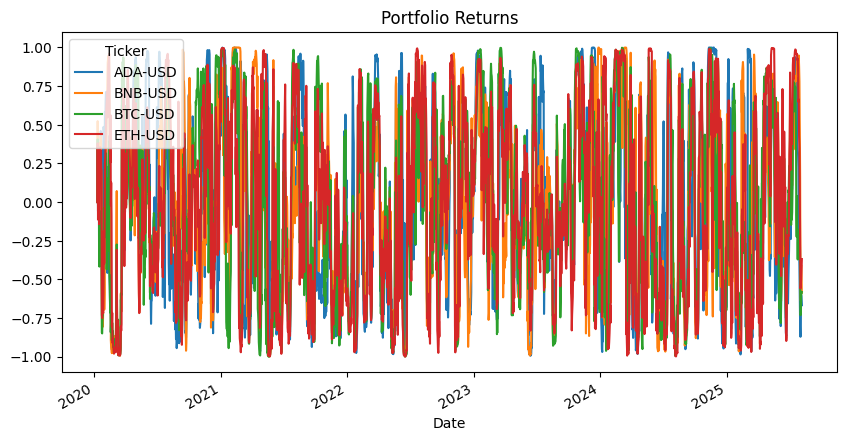

In [8]:
port.plot(figsize=(10,5), title='Portfolio Returns')

<Axes: title={'center': 'Strategy Returns'}, xlabel='Date'>

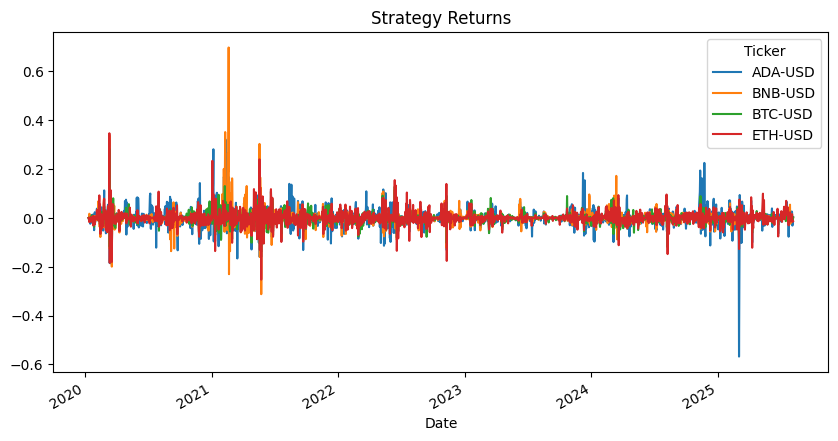

In [9]:
strat_ret.plot(figsize=(10,5), title='Strategy Returns')

In [4]:
# strategy sharpes
strat_ret.mean()/strat_ret.std()*np.sqrt(365)

Ticker
ADA-USD    0.441760
BNB-USD    0.489249
BTC-USD    0.323257
ETH-USD    0.484221
dtype: float64

<Axes: xlabel='Date'>

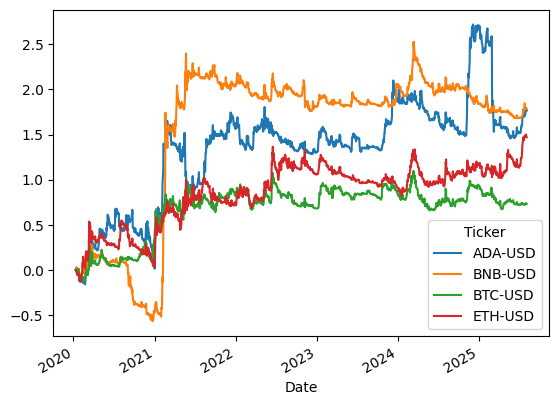

In [5]:
# plot strategy cum returns
strat_ret.cumsum().plot()

In [6]:
# correlations with underlying assets. Fairly lowly correlated, 
# suggesting we could enhance a buy and hold strategy with TS momentum
strat_ret.corrwith(ret)

Ticker
ADA-USD   -0.059498
BNB-USD    0.131125
BTC-USD   -0.234832
ETH-USD   -0.232658
dtype: float64